### Image scraping using beautiful soup
- Get a motivational post
- Scrape the image from HTML

In [1]:
import bs4
import requests

In [2]:
url = "https://www.passiton.com/inspirational-quotes?page=2"

In [3]:
response = requests.get(url)
response.content

b'<!DOCTYPE html>\n<html class="no-js" dir="ltr" lang="en-US">\n    <head>\n        <title>Inspirational Quotes - Motivational Quotes - Leadership Quotes | Page 2 | PassItOn.com</title>\n        <meta charset="utf-8">\n        <meta http-equiv="content-type" content="text/html; charset=utf-8" />\n        <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n        <meta name="viewport" content="width=device-width,initial-scale=1.0" />\n        <meta name="description" content="The Foundation for a Better Life | Pass It On.com">\n        <link rel="apple-touch-icon" sizes="180x180" href="/apple-touch-icon.png">\n        <link rel="icon" type="image/png" sizes="32x32" href="/favicon-32x32.png">\n        <link rel="icon" type="image/png" sizes="16x16" href="/favicon-16x16.png">\n        <link rel="manifest" href="/site.webmanifest">\n        <link rel="mask-icon" href="/safari-pinned-tab.svg" color="#c8102e">\n        <meta name="msapplication-TileColor" content="#c8102e">\n        <m

In [4]:
#HTML parser
soup = bs4.BeautifulSoup(response.content)
type(soup)

bs4.BeautifulSoup

In [5]:
img_tags = soup.find_all("img")
img_tags

[<img alt="Pass It On" class="logo-dark" data-rjs="/assets/site/logo@2x-77b9f4fa1e4bafa6ff119f8f162b7bd9.png" src="/assets/site/logo-6d680decaadef58e4fbb586e147bc135.png"/>,
 <img alt="Pass It On" class="logo-light default" data-rjs="/assets/site/logo-white@2x-82bf2486063a48e9207811cc7f6d5e5f.png" src="/assets/site/logo-white-2d99f390ad2f6d3bbf59a52aadb55d60.png"/>,
 <img alt="The bond that links your true family is not one of blood, but of respect and joy in each other's life. Rarely do members of one family grow up under the same roof. #&lt;Author:0x00007f188beb8e80&gt;" class="margin-10px-bottom shadow" height="310" src="https://assets.passiton.com/quotes/quote_artwork/7182/medium/20211229_wednesday_quote.jpg?1640015962" width="310"/>,
 <img alt="Having somewhere to go is home, having someone to love is family, having both is blessing. #&lt;Author:0x00007f188bee6fd8&gt;" class="margin-10px-bottom shadow" height="310" src="https://assets.passiton.com/quotes/quote_artwork/7183/medium/

We dont need the first 2 images, they are for logos

In [6]:
img_tags = img_tags[2:]

In [7]:
img_tags

[<img alt="The bond that links your true family is not one of blood, but of respect and joy in each other's life. Rarely do members of one family grow up under the same roof. #&lt;Author:0x00007f188beb8e80&gt;" class="margin-10px-bottom shadow" height="310" src="https://assets.passiton.com/quotes/quote_artwork/7182/medium/20211229_wednesday_quote.jpg?1640015962" width="310"/>,
 <img alt="Having somewhere to go is home, having someone to love is family, having both is blessing. #&lt;Author:0x00007f188bee6fd8&gt;" class="margin-10px-bottom shadow" height="310" src="https://assets.passiton.com/quotes/quote_artwork/7183/medium/20211228_tuesday_quote.jpg?1640015915" width="310"/>,
 <img alt="Do your little bit of good where you are; its those little bits of good put together that overwhelm the world. #&lt;Author:0x00007f188bf12700&gt;" class="margin-10px-bottom shadow" height="310" src="https://assets.passiton.com/quotes/quote_artwork/5990/medium/20211227_monday_quote.jpg?1640575891" width=

Similarly, the last 2 images are of no use to us

In [8]:
img_tags = img_tags[:-2]

In [9]:
img_tags

[<img alt="The bond that links your true family is not one of blood, but of respect and joy in each other's life. Rarely do members of one family grow up under the same roof. #&lt;Author:0x00007f188beb8e80&gt;" class="margin-10px-bottom shadow" height="310" src="https://assets.passiton.com/quotes/quote_artwork/7182/medium/20211229_wednesday_quote.jpg?1640015962" width="310"/>,
 <img alt="Having somewhere to go is home, having someone to love is family, having both is blessing. #&lt;Author:0x00007f188bee6fd8&gt;" class="margin-10px-bottom shadow" height="310" src="https://assets.passiton.com/quotes/quote_artwork/7183/medium/20211228_tuesday_quote.jpg?1640015915" width="310"/>,
 <img alt="Do your little bit of good where you are; its those little bits of good put together that overwhelm the world. #&lt;Author:0x00007f188bf12700&gt;" class="margin-10px-bottom shadow" height="310" src="https://assets.passiton.com/quotes/quote_artwork/5990/medium/20211227_monday_quote.jpg?1640575891" width=

In [10]:
#Working on a single image
img = img_tags[0]
img.attrs

{'alt': "The bond that links your true family is not one of blood, but of respect and joy in each other's life. Rarely do members of one family grow up under the same roof. #<Author:0x00007f188beb8e80>",
 'class': ['margin-10px-bottom', 'shadow'],
 'src': 'https://assets.passiton.com/quotes/quote_artwork/7182/medium/20211229_wednesday_quote.jpg?1640015962',
 'width': '310',
 'height': '310'}

We have to focus on the src attribute

In [11]:
img.attrs["src"]

'https://assets.passiton.com/quotes/quote_artwork/7182/medium/20211229_wednesday_quote.jpg?1640015962'

### Writing this image in a file
- Using a binary file

In [12]:
with open("inspiration.jpg", "wb") as f:

    img_src = img.attrs["src"]
    response = requests.get(img_src)

    f.write(response.content)

In [13]:
#Viewing this image using the matplotlib library
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

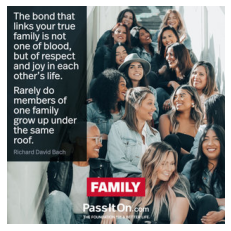

In [27]:
with open("inspiration.jpg", "wb") as f:

    img_src = img.attrs["src"]
    response = requests.get(img_src)

    f.write(response.content)

img_array = plt.imread(BytesIO(response.content), format="jpg")

plt.axis("off")
plt.imshow(img_array)
plt.imshow(img_array)

In [28]:
#Saving all the images from the array

for pos, img in enumerate(img_tags):
    with open(f"inspiration{pos}.jpg", "wb") as f:

        img_src = img.attrs["src"]
        response = requests.get(img_src)

        f.write(response.content)

print("Done writing files")

Done writing files


We just saved 32 images with a short code